In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
user_cert_df = pd.read_csv('user_certification.csv')
certifications_df = pd.read_csv('certifications.csv')
user_certification = pd.read_csv('user_certification.csv')
user_skill_df = pd.read_csv('user_skill.csv')
role_skill_df = pd.read_csv('role_skill.csv')
certifications_df = pd.read_csv('certifications.csv')  

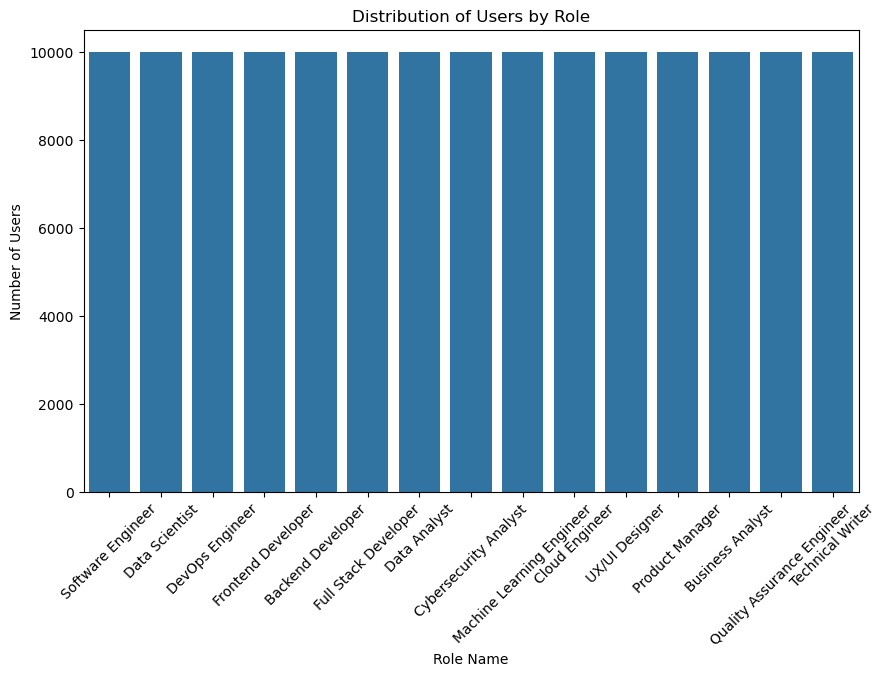

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(data=user_cert_df, x='role_name', order=user_cert_df['role_name'].value_counts().index)
plt.title('Distribution of Users by Role')
plt.xticks(rotation=45)
plt.xlabel('Role Name')
plt.ylabel('Number of Users')
plt.show()


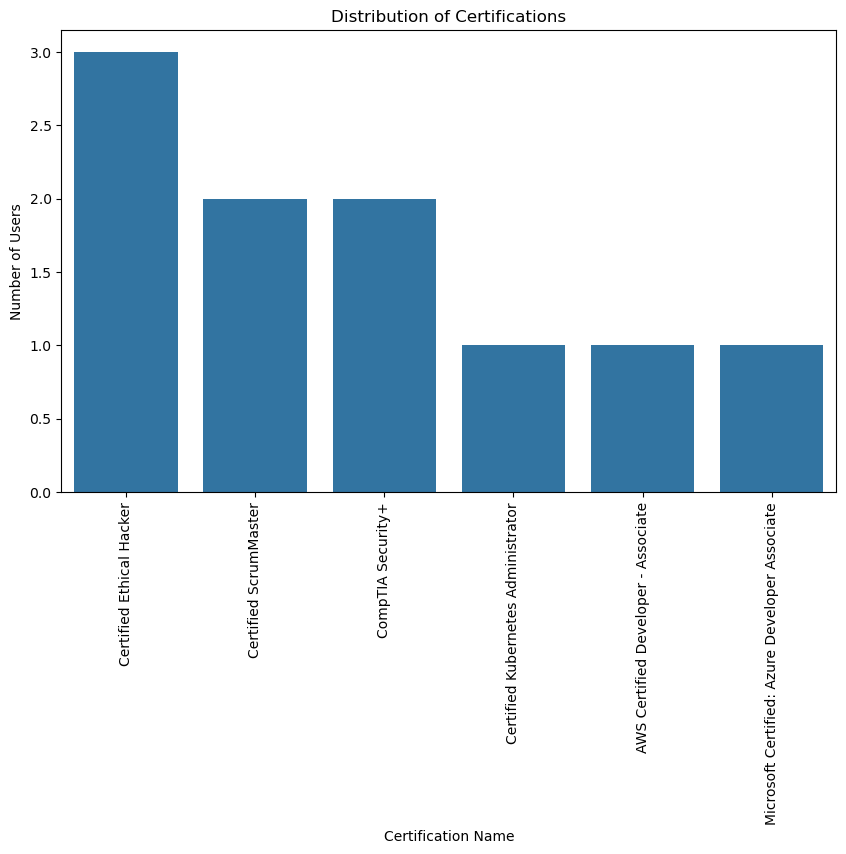

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(data=user_cert_df[:10], x='certificationName', order=user_cert_df['certificationName'][:10].value_counts().index)
plt.title('Distribution of Certifications')
plt.xticks(rotation=90)
plt.xlabel('Certification Name')
plt.ylabel('Number of Users')
plt.show()

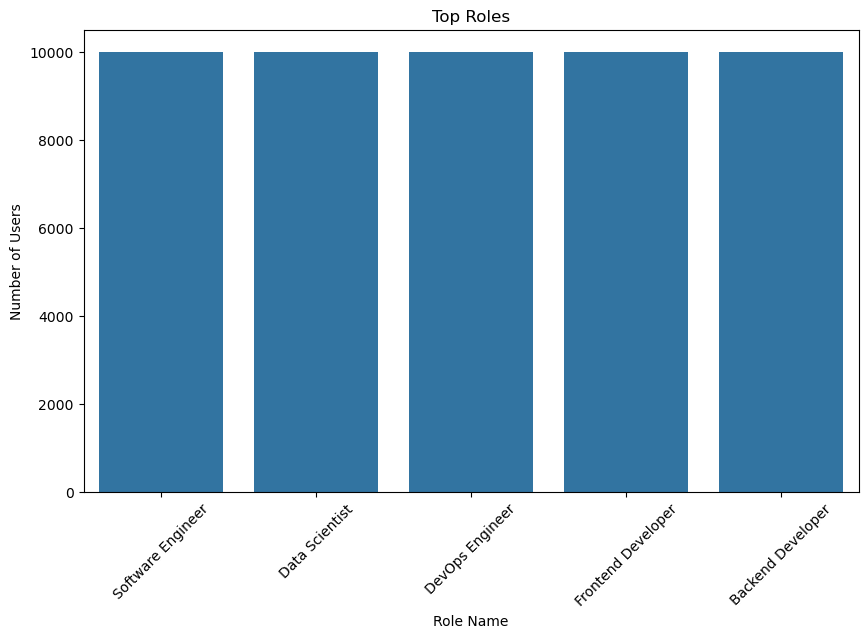

In [83]:
top_roles = user_cert_df['role_name'].value_counts().head(5)
    
plt.figure(figsize=(10, 6))
sns.barplot(x=top_roles.index, y=top_roles.values)
plt.title('Top Roles')
plt.xticks(rotation=45)
plt.xlabel('Role Name')
plt.ylabel('Number of Users')
plt.show()

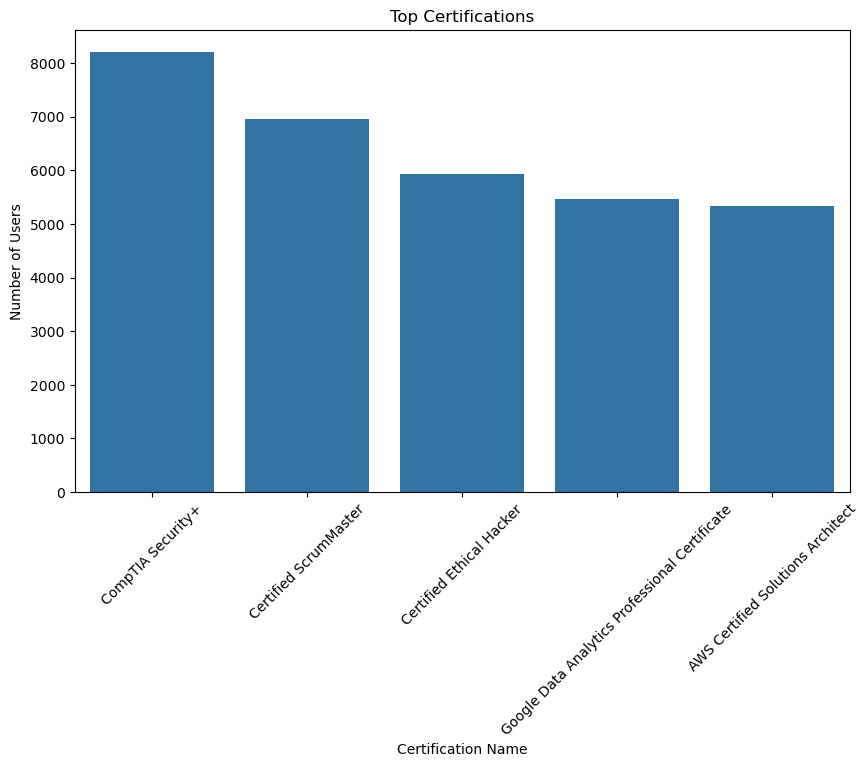

In [84]:
top_certs = user_cert_df['certificationName'].value_counts().head(5)
    
plt.figure(figsize=(10, 6))
sns.barplot(x=top_certs.index, y=top_certs.values)
plt.title('Top Certifications')
plt.xticks(rotation=45)
plt.xlabel('Certification Name')
plt.ylabel('Number of Users')
plt.show()

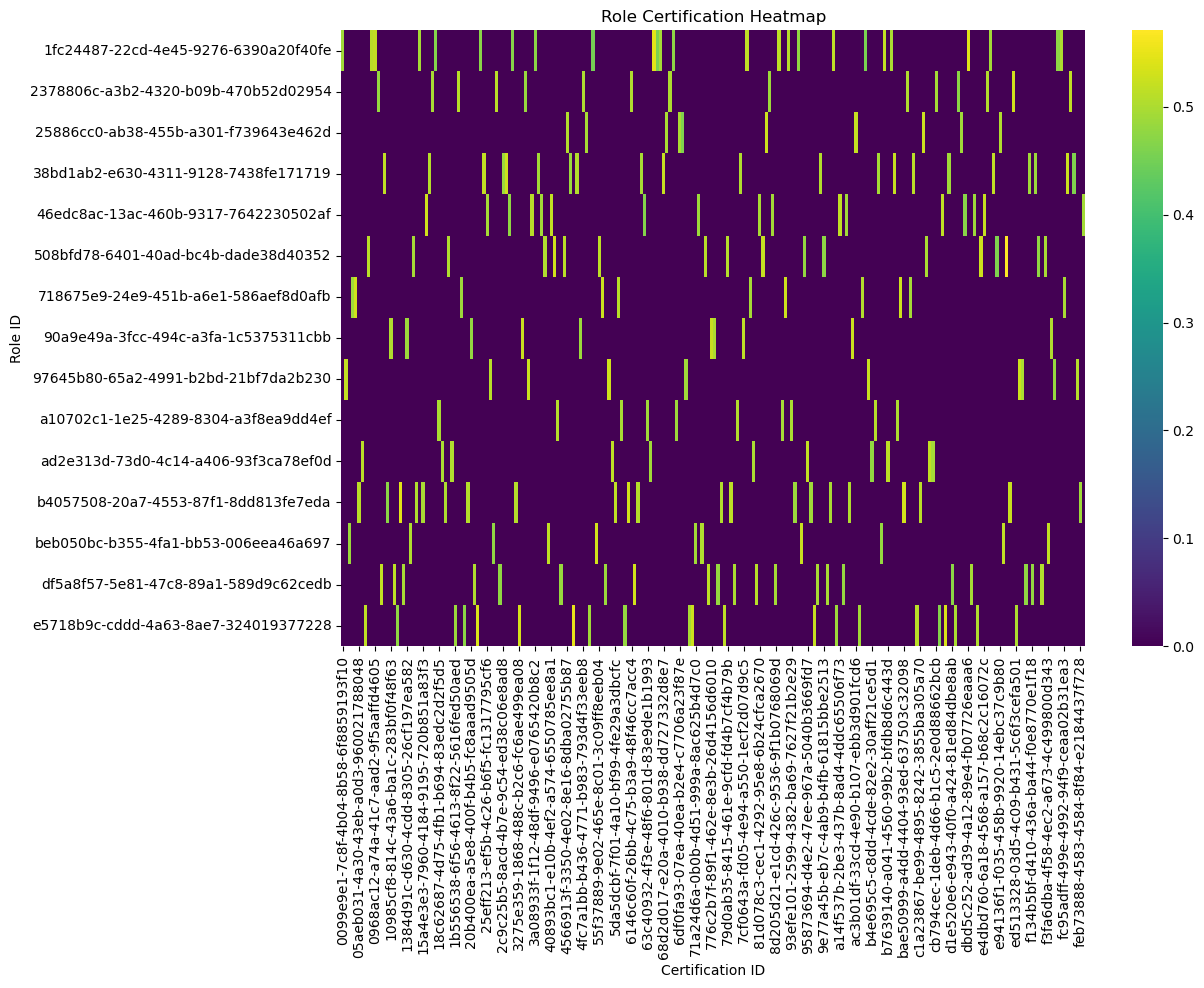

In [85]:
user_cert_df = pd.read_csv('user_certification.csv')

# Create a pivot table with roleId as the index and certificationId as the columns
role_cert_matrix = user_cert_df.pivot_table(index='role_id', columns='certificationId', values='isVerified').fillna(0)

# Visualize the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(role_cert_matrix, cmap='viridis', cbar=True)
plt.title('Role Certification Heatmap')
plt.xlabel('Certification ID')
plt.ylabel('Role ID')
plt.show()

In [80]:
unique_certifications = user_cert_df['certificationId'].nunique()
unique_roles = user_cert_df['role_id'].nunique()
print(f"\nUnique Certifications: {unique_certifications}")
print(f"Unique Roles: {unique_roles}")


Unique Certifications: 232
Unique Roles: 15


In [86]:
cert_count = user_cert_df.groupby('userId_x')['has_certification'].sum().reset_index()
cert_count.columns = ['userId_x', 'certification_count']
user_cert_df = user_cert_df.merge(cert_count, on='userId_x', how='left')

KeyError: 'Column not found: has_certification'

In [50]:
user_id = '579c6abd-99d0-4012-bc58-ee780164255d'  #softwareEngineer
user_id = '9448612f-8305-46e7-8306-a1e185013991'  #Backend Dev
user_id = 'c1705e9d-9950-4604-94f6-ef96177b33cc'  #ML
user_id = '9ef4d8b9-a6e5-4cef-a42f-0aa1f7d821e1'  #Product manager

In [51]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assuming 'user_certification', 'certifications_df', and 'user_cert_df' are available as DataFrames


# Pivot the data to create a user-certification matrix
user_cert_matrix = user_cert_df.pivot_table(index='userId_x', columns='certificationId', values='isVerified').fillna(0)

# Compute cosine similarity between users
user_similarity = cosine_similarity(user_cert_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_cert_matrix.index, columns=user_cert_matrix.index)

# Function to recommend certifications for a specific user based on similar users
def recommend_certifications(user_id, num_recommendations=5):
    # Ensure user_id exists in user_cert_matrix
    if user_id not in user_cert_matrix.index:
        return f"User ID {user_id} not found in the dataset."
    
    # Get similar users
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).index[1:]
    
    # Aggregate certifications from similar users
    similar_users_certifications = user_cert_matrix.loc[similar_users].sum().sort_values(ascending=False)
    
    # Filter out certifications the user has already completed
    user_certifications = user_cert_matrix.loc[user_id]
    recommended_certs = similar_users_certifications[user_certifications == 0].head(num_recommendations)
    
    # Pre-fetch certification names and user roles to avoid repeated lookups
    cert_name_map = dict(zip(certifications_df['_id'], certifications_df['name']))
    
    # Extract roles for all similar users at once
    user_roles = user_cert_df.set_index('userId_x')['role_id'].loc[similar_users].to_dict()
    
    # Create a DataFrame for the recommendations
    recommendations = [
        {
            'user_id': similar_user,
            'certification_id': cert_id,
            'certification_name': cert_name_map.get(cert_id, None),
            'user_role': user_roles.get(similar_user, None)
        }
        for cert_id in recommended_certs.index
        for similar_user in similar_users
        if cert_id in user_cert_matrix.columns and user_cert_matrix.loc[similar_user, cert_id] == 0
    ]
    
    return pd.DataFrame(recommendations)

recommended_certifications = recommend_certifications(user_id)
print(recommended_certifications)


                                     user_id  \
0       5eb97b40-b5a1-4ae7-82be-12b7f3380f59   
1       fab59c14-762a-4b4c-a839-1a85f80d5712   
2       4aaf15c0-460a-41f9-baaf-1ca60fd55a54   
3       c8351dcd-8059-4aa0-8e78-926b02d76110   
4       06a7c716-5ecf-46b5-bc09-c2518986c344   
...                                      ...   
147519  57199b78-7b8f-4014-b7a7-f19736ed4d04   
147520  5714c2b6-a552-4dfd-93f7-a4e6ee19705d   
147521  5713efe5-c292-4dee-b652-3c05ff63df82   
147522  57133aae-296a-430c-a54e-4ed1462dab56   
147523  ffff9f64-e7bb-49a7-ba11-ecd5b30c1695   

                            certification_id  \
0       58ac6d2f-bb0d-4e4e-bafa-18496c2ed57d   
1       58ac6d2f-bb0d-4e4e-bafa-18496c2ed57d   
2       58ac6d2f-bb0d-4e4e-bafa-18496c2ed57d   
3       58ac6d2f-bb0d-4e4e-bafa-18496c2ed57d   
4       58ac6d2f-bb0d-4e4e-bafa-18496c2ed57d   
...                                      ...   
147519  34ca4f75-b2c9-455c-920b-a0d9597f3259   
147520  34ca4f75-b2c9-455c-920b-a0d9597

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd


user_item_matrix = user_certification.pivot_table(index='userId_x', columns='certificationId',
                                                   values='competency', fill_value=0)

svd = TruncatedSVD(n_components=10)
user_item_matrix_svd = svd.fit_transform(user_item_matrix)

# Cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix_svd)

# Recommend certifications based on similar users
def recommend_collaborative(user_id, top_n=5):
    try:
        user_idx = user_item_matrix.index.get_loc(user_id)  # Get user index
    except KeyError:
        print(f"User ID {user_id} not found.")
        return []

    similar_users = user_similarity[user_idx].argsort()[-top_n:][::-1]  # Get indices of similar users

    # Get certifications done by similar users
    similar_user_ids = user_item_matrix.index[similar_users]
    recommended_certifications = user_certification[user_certification['userId_x'].isin(similar_user_ids)]

    # Return top N unique certification names
    return recommended_certifications['certificationName'].value_counts().head(top_n)

# Example usage
user_id = '0f988104-a7b9-43e6-8cd1-1cb63d1a68fa'  # Replace with an actual user ID
recommended_certifications = recommend_collaborative(user_id)
print("Recommended Certifications:", recommended_certifications)

Content based

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import pandas as pd

# Load DataFrames
# Ensure you have this dataset

# Print the columns to check for certification or role-related info
print(role_skill_df.columns)
print(user_skill_df.columns)

# Merge data to get skills related to each role_id (or certification)
certification_skills = role_skill_df[['roleId_x', 'skill_name']].groupby('roleId_x')['skill_name'].apply(lambda x: ' '.join(x)).reset_index()

# Calculate TF-IDF for skills associated with roles (or certifications)
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(certification_skills['skill_name'])

# Function to recommend certifications based on user skills and roleId_x
def recommend_content_based(user_id, role_id, num_recommendations=5):
    # Get the user's skills from user_skill_df
    user_skills = ' '.join(user_skill_df[user_skill_df['userId_x'] == user_id]['skill_name'])
    user_tfidf = tfidf.transform([user_skills])

    # Calculate cosine similarity between user skills and certification/role skills
    cosine_sim = linear_kernel(user_tfidf, tfidf_matrix).flatten()
    print(certification_skills.columns)

    # Get indices of roles associated with the specific role_id
    role_indices = certification_skills[certification_skills['roleId_x'] == role_id].index
    # Filter cosine similarities to only consider the specified role
    filtered_similarities = cosine_sim[role_indices]

    # Get indices of the top recommended roles
    top_indices = filtered_similarities.argsort()[-num_recommendations:][::-1]

    # Return the recommended certifications based on roleId_x
    recommended_role_ids = certification_skills.iloc[role_indices[top_indices]]['roleId_x']
    recommended_certification_names = certifications_df[certifications_df['_id'].isin(recommended_role_ids)]['name'].unique()
    print(certification_skills.columns)

    return recommended_certification_names

# Example usage (replace with an actual user_id and role_id from your data)
user_id = '9ef4d8b9-a6e5-4cef-a42f-0aa1f7d821e1'
role_id = '718675e9-24e9-451b-a6e1-586aef8d0afb'    # Replace with a valid role ID that exists in your dataset
recommended_certifications = recommend_content_based(user_id, role_id)
print(recommended_certifications)


Index(['Unnamed: 0', 'roleId_x', 'skillId', 'name_x', 'role_name',
       'skill_name', '_id_x', 'name_y', 'desc_x', 'created_at_x',
       'updated_at_x', 'roleId_y', 'skill_count', '_id_y', 'name',
       'created_at_y', 'updated_at_y', 'desc_y', 'user_count'],
      dtype='object')
Index(['Unnamed: 0.1', '_id_x', 'userId_x', 'skillId', 'score', 'user_name',
       'skill_name', 'total_duration', 'count', 'name_x', 'role_id',
       'joining_date', 'department', 'mail', 'created_at_x', 'updated_at_x',
       'password', 'profileImage', 'role_name', 'Unnamed: 0', '_id', 'desc',
       'user_count'],
      dtype='object')
Index(['roleId_x', 'skill_name'], dtype='object')
Index(['roleId_x', 'skill_name'], dtype='object')
[]


KNN

In [21]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Load the user_certification DataFrame (assuming it has role information)


# Pivot the data to create a user-certification matrix
user_cert_matrix = user_cert_df.pivot_table(index='userId_x', columns='certificationId', values='isVerified').fillna(0)

# Create a DataFrame to map user IDs to names, roles, and certification IDs to names
user_info = user_cert_df[['userId_x', 'user_name', 'role_id', 'role_name']].drop_duplicates().set_index('userId_x')
cert_names = user_cert_df[['certificationId', 'certificationName']].drop_duplicates().set_index('certificationId')

# Calculate the number of unique roles
unique_roles = user_cert_df['role_id'].nunique()  # or 'role_name' if you want to use role names
print(f"Number of unique roles: {unique_roles}")

# Build the KNN model with neighbors based on the unique roles
knn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=unique_roles)
knn_model.fit(user_cert_matrix)

# Function to recommend top 5 certifications using KNN with neighbor count based on roles
def recommend_knn_by_role(user_id):
    # Ensure that the user exists
    if user_id not in user_cert_matrix.index:
        return f"User ID {user_id} not found in the dataset."
    
    # Get the index of the user in the matrix
    user_idx = user_cert_matrix.index.get_loc(user_id)

    # Find nearest neighbors (based on unique role count)
    distances, indices = knn_model.kneighbors([user_cert_matrix.iloc[user_idx]], n_neighbors=unique_roles + 1)
    
    # Ignore the first neighbor, as it will be the user itself
    similar_users = user_cert_matrix.index[indices.flatten()[1:]]
    
    # Aggregate certifications from similar users and recommend
    similar_users_certifications = user_cert_matrix.loc[similar_users].sum().sort_values(ascending=False)
    user_certifications = user_cert_matrix.loc[user_id]
    
    # Filter out certifications that the user already has
    recommended_certs = similar_users_certifications[user_certifications == 0].head(5)  # Get top 5

    # Create a DataFrame for the recommended certifications with user names
    recommended_cert_names = pd.DataFrame(recommended_certs).reset_index()
    recommended_cert_names.columns = ['certificationId', 'count']
    recommended_cert_names = recommended_cert_names.merge(cert_names, on='certificationId')

    # Get user info for the requesting user
    user_name = user_info.loc[user_id, 'user_name']
    user_role = user_info.loc[user_id, 'role_name']  # Get the user's role name

    # Displaying the user name and role along with recommended certifications
    print(f"Top 5 Recommendations for {user_name} (Role: {user_role}):\n")
    
    for _, row in recommended_cert_names.iterrows():
        print(f"- {row['certificationName']}")

    # return recommended_cert_names

recommend_knn_by_role(user_id)


Number of unique roles: 15
Top 5 Recommendations for Mr. Sean Smith (Role: Product Manager):

- Certified Agile Leadership (CAL)
- Certified Information Systems Security Professional
- Certified Technical Writer (CTW)
- Databricks Certified Associate Developer for Apache Spark
- CompTIA Security+


c:\Users\RithikHarendarMahesh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
